# Matematické kyvadlo

Vložení knihoven

In [1]:
import numpy as np # efektivně implementovaná numerická pole
from scipy.integrate import ode # integrace obyčejných diferenciálních rovnic
import matplotlib.pyplot as plt # grafy
import matplotlib.animation as animation # animace

Definice pravé strany diferenciální rovnice
$$
\frac{{\rm d} \varphi}{{\rm d} t} = p_\varphi, \quad \frac{{\rm d} p_\varphi}{{\rm d} t} = -\sin\varphi
$$

In [2]:
def derivace(t,stav,omega):
    # d fi / d t = p_fi  
    # d p_fi / d t = - omega**2 * sin(fi)
    fi, p_fi = stav
    f = [p_fi,-omega**2*np.sin(fi)]
    return f

Vytvoření řešitele (objekt `resitel`, instance třídy `ode`), vybrání metody řešení `'dopri5'`, což je  Runge-Kuttova metoda řádu (4)5 vytvořená Dormandem & Princem a nastavení parametru $\omega$

In [3]:
resitel = ode(derivace) # vytvoření objektu
resitel.set_integrator('dopri5') # volba integrační metody
omega = 1.0 # hodnota parametru
resitel.set_f_params(omega) # nastavení parametru

Nastavení počátečních podmínek

In [4]:
t0 = 0.0 # počáteční čas
stav0 = [2.0*np.pi/3.0, 0.0] # počáteční stav, výchylka 2*pi/3, nulová rychlost
resitel.set_initial_value(stav0, t0)

Vytvoření pole časových hodnot `t`, pro které se vypočteme řešení. Vytvoření pole `reseni` pro řešení a vložení počáteční podmínky na jeho začátek

In [5]:
t1 = 8.62606 # právě jedna perioda, spočteno pomocí úplného eliptického integrálu
N = 100
t = np.linspace(t0, t1, N) # rovnoměrně rozdělíme interval [t0,t1] na N dílků a vytvoříme z něj pole
reseni = np.empty((N, 2)) # vytvoříme prázdné pole
reseni[0] = stav0 # na 0. pozici doplníme počáteční podmínku

Opakované volání metody `integrate` objektu `resitel`

In [6]:
k = 1
while resitel.successful() and resitel.t < t1: # pokud nenastane chyba a čas je menší než t1 opakuj
    resitel.integrate(t[k]) # volání integrační metody dopri5
    reseni[k] = resitel.y # uložení do pole reseni
    k += 1 # zvyš proměnnou k o 1


Na závěr vykreslíme graf závislosti úhlu $\varphi$ na čase $t$

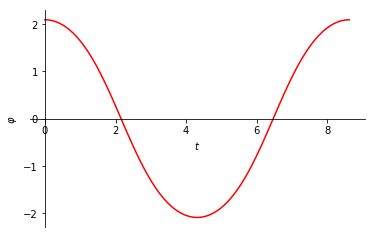

In [7]:
plt.plot(t, reseni[:,0],"red")
plt.xlabel(r'$t$')
plt.ylabel(r'$\varphi$')
plt.grid(False)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.show()

Pro zajímavost můžeme porovnat s výsledkem v aproximaci malých kmitů, tj. $\sin \varphi \approx \varphi$

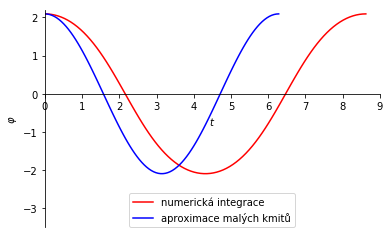

In [8]:
t_pribl = np.linspace(0, 2*np.pi, N)
fi_pribl = 2*np.pi/3*np.cos(t_pribl)
plt.plot(t, reseni[:,0],"red",label="numerická integrace")
plt.plot(t_pribl,fi_pribl,"blue",label="aproximace malých kmitů")
plt.xlabel(r'$t$')
plt.ylabel(r'$\varphi$')
plt.grid(False)
ax = plt.gca()
plt.axis([0, 9, -3.5, 2.2])
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.legend(loc=8, borderaxespad=0.)
plt.show()

In [9]:
x = np.sin(reseni[:, 0]) # souřadnice koncového bodu kyvadla
y = -np.cos(reseni[:, 0])
dt = (t1-t0)/N # časový krok

In [14]:
%matplotlib inline 
from IPython.display import HTML # pro zobrazení animace v HTML

fig = plt.figure() 

ax.grid(False)
ax = fig.add_subplot(111, autoscale_on=False,aspect='equal', xlim=(-1.2, 1.2), ylim=(-1.2, 1.2))

cara, = ax.plot([], [], 'o-', lw=2)
cas_template = 'Čas = %.1fs'
cas_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    cara.set_data([], [])
    cas_text.set_text('')
    return cara, cas_text


def animuj(i):
    thisx = [0, x[i]]
    thisy = [0, y[i]]

    cara.set_data(thisx, thisy)
    cas_text.set_text(cas_template % (i*dt))
    return cara, cas_text


ani = animation.FuncAnimation(fig, animuj, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)
plt.close()

ani.save('Matematicke_kyvadlo.mp4', fps=15) # animaci uložíme jako video

In [12]:
HTML(ani.to_html5_video())